# **Data Preprocess Harga Rumah**

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/Shareddrives/Capstone Project/Product Capstone/ML/Preprocess/DATA RUMAH.xlsx', sheet_name='Sheet1')
df.info()

### Explanatory Data Analysis

In [ ]:
# Lihat 5 data pertama
df.head()

In [ ]:
# Statistik dasar dari data
df.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
# Informasi kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [ ]:
# Cek nilai kosong
df.isnull().values.any()


False

In [ ]:
df = df.drop(['NO','NAMA RUMAH'],axis=1)

In [ ]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [ ]:
# Menggunakan fungsi duplicated() untuk menemukan baris-baris yang redundan
data_redundant = df[df.duplicated()]

# Menampilkan baris-baris yang redundan
print("Data Redundan:")
print(data_redundant)

Data Redundan:
            HARGA   LB   LT  KT  KM  GRS
158    2600000000  120  150   3   2    1
187    6750000000  350  210   4   4    1
192    8800000000  400  230   6   6    2
214    5500000000  170  270   6   3    1
231    5600000000  250  225   5   3    2
232    3200000000  150   80   5   3    1
246    7200000000  250  161   3   3    2
273    4500000000  250   96   5   4    1
275    4000000000  200  146   3   1    1
309    9000000000  470  353   9   6    3
310    3500000000  190  100   5   4    2
323    2550000000  150   90   4   4    2
324   23000000000  350  565   5   3    4
362   13000000000  250  322   4   3    2
388    7800000000  160  261   3   4    2
399    4000000000  216  135   5   4    2
401   13000000000  216  384   3   3    2
409   23000000000  350  565   5   3    4
418    3900000000  179  142   5   4    2
468    3500000000  350  100   4   4    2
569    4000000000  216  135   5   4    1
579    4300000000  200  145   3   3    2
584    4000000000  200  160   5   4    2
6

In [ ]:
# Buang duplikat
df = df.drop_duplicates()

In [ ]:
# Lihat info setelah duplikat dibuang
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   967 non-null    int64
 1   LB      967 non-null    int64
 2   LT      967 non-null    int64
 3   KT      967 non-null    int64
 4   KM      967 non-null    int64
 5   GRS     967 non-null    int64
dtypes: int64(6)
memory usage: 52.9 KB


Identifikasi Outliers

- Atribut Lb

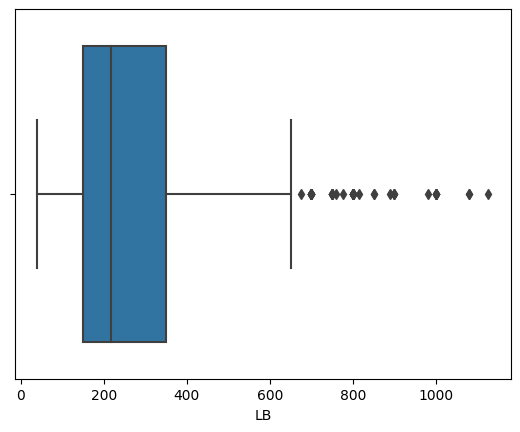

In [ ]:
# Identifikasi Outliers atribut LB
sns.boxplot(x='LB', data=df);

In [ ]:
# Menentukan batas atas dan batas bawah
q11,q31=np.percentile(df['LB'], [25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
print("Q1 :", q11)
print("Q3 :",q31)
print("Selisih :",s1)
print("Batas Atas :",ba1)
print("Batas Bawah :",bw1)

Q1 : 150.0
Q3 : 350.0
Selisih : 200.0
Batas Atas : 650.0
Batas Bawah : -150.0


In [ ]:
# shows outlier data on the LB attribute
dt1 = df[(df['LB']<bw1) | (df['LB']>ba1)]
dt1.head()

,HARGA,LB,LT,KT,KM,GRS
31,42000000000,900,600,7,7,1
50,41000000000,850,600,7,7,0
54,23000000000,750,610,8,6,4
102,15000000000,800,1225,6,9,2
103,30000000000,800,752,6,4,0


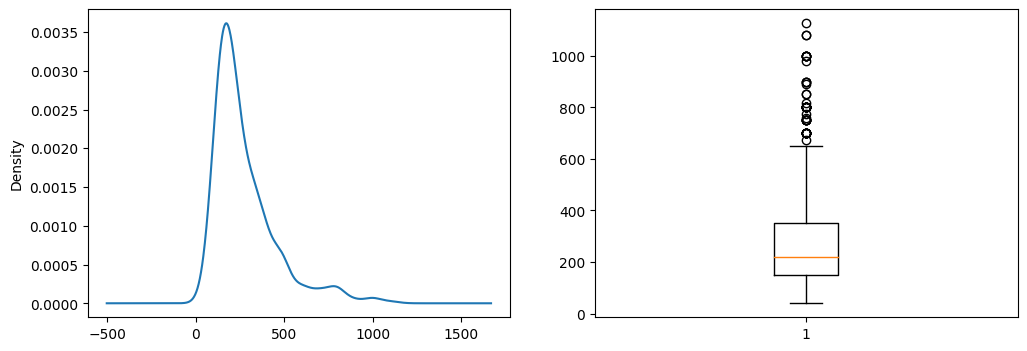

In [ ]:
# Distribusi data
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')

f.add_subplot(1,2,2 )
plt.boxplot(df['LB'])

plt.show()

- Atribut LT

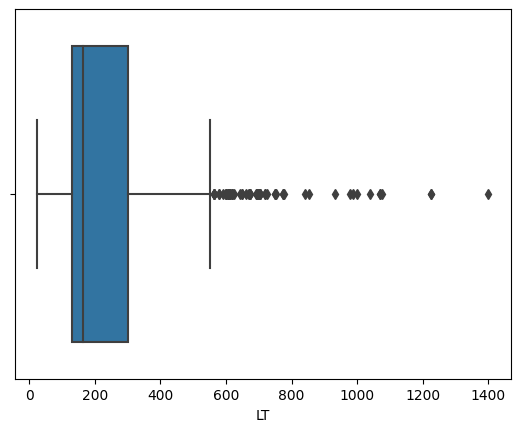

In [ ]:
sns.boxplot(x='LT', data=df);

In [ ]:
q12,q32=np.percentile(df['LT'], [25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
print("Q1 :",q12)
print("Q3 :",q32)
print("Selisih :",s2)
print("Batas Atas :",ba2)
print("Batas Bawah :",bw2)

Q1 : 130.0
Q3 : 300.0
Selisih : 170.0
Batas Atas : 555.0
Batas Bawah : -125.0


In [ ]:
# shows outlier data on the LT attribute
dt2 = df[(df['LT']<bw2) | (df['LT']>ba2)]
dt2.head()

,HARGA,LB,LT,KT,KM,GRS
13,12500000000,200,979,4,2,6
20,14000000000,300,700,8,5,2
24,11000000000,650,695,9,6,2
31,42000000000,900,600,7,7,1
43,15000000000,339,643,7,5,5


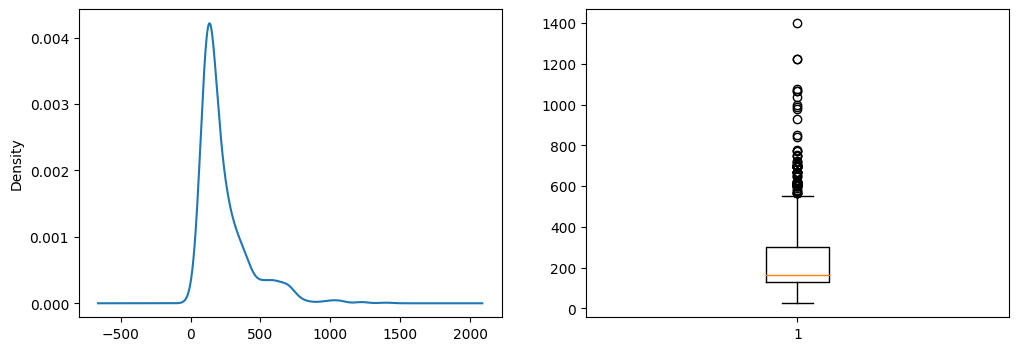

In [ ]:
# Distribusi data

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['LT'])

plt.show()

- Atribut KT

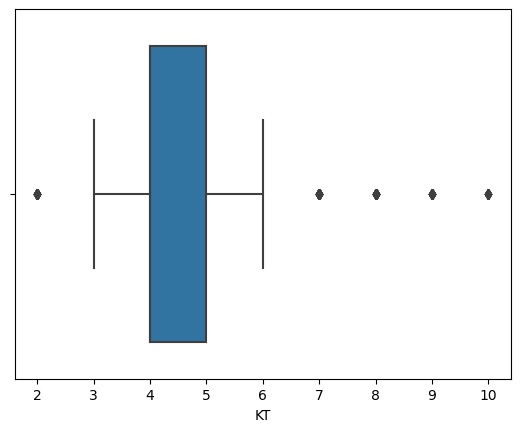

In [ ]:
sns.boxplot(x='KT', data=df);

In [ ]:
q13,q33=np.percentile(df['KT'], [25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
print("Q1 :",q13)
print("Q3 :",q33)
print("Selisih :",s3)
print("Batas Atas :",ba3)
print("Batas Bawah :",bw3)

Q1 : 4.0
Q3 : 5.0
Selisih : 1.0
Batas Atas : 6.5
Batas Bawah : 2.5


In [ ]:
# shows outlier data on the KT attribute
dt3 = df[(df['KT']<bw3) | (df['KT']>ba3)]
dt3.head()

,HARGA,LB,LT,KT,KM,GRS
3,430000000,40,25,2,2,0
20,14000000000,300,700,8,5,2
21,8000000000,315,218,7,3,2
22,700000000,75,75,2,3,0
24,11000000000,650,695,9,6,2


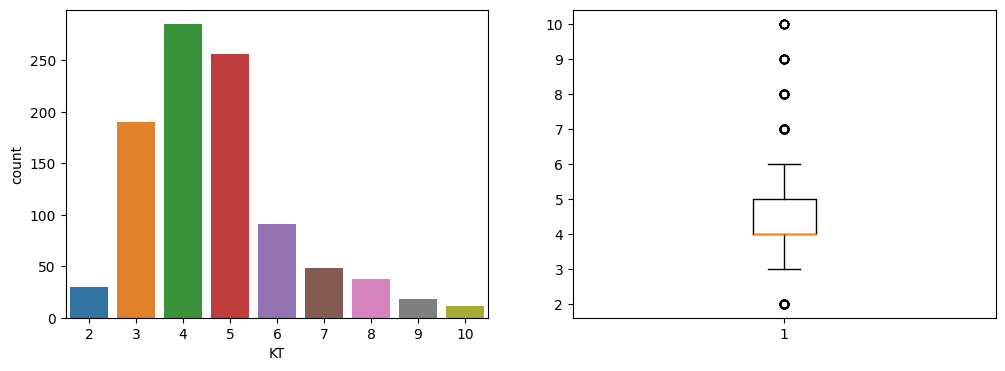

In [ ]:
# Distribusi data

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KT'])

f.add_subplot(1,2,2)
plt.boxplot(df['KT'])

plt.show()

- Atribut KM

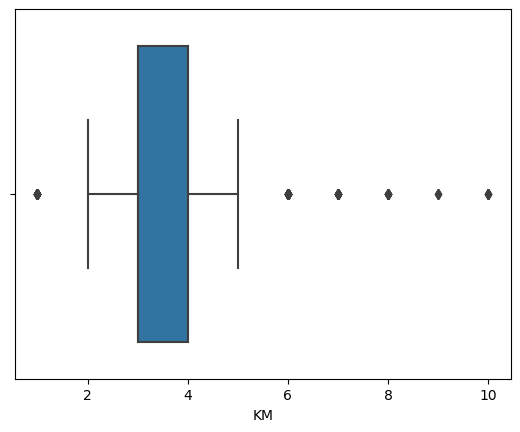

In [ ]:
sns.boxplot(x='KM', data=df);

In [ ]:
q14,q34=np.percentile(df['KM'], [25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
print("Q1 :",q14)
print("Q3 :",q34)
print("Selisih :",s4)
print("Batas Atas :",ba4)
print("Batas Bawah :",bw4)

Q1 : 3.0
Q3 : 4.0
Selisih : 1.0
Batas Atas : 5.5
Batas Bawah : 1.5


In [ ]:
# shows outlier data on the KM attribute
dt4 = df[(df['KM']<bw4) | (df['KM']>ba4)]
dt4.head()

,HARGA,LB,LT,KT,KM,GRS
24,11000000000,650,695,9,6,2
31,42000000000,900,600,7,7,1
32,1100000000,102,102,2,1,0
34,3600000000,145,200,8,8,1
45,6000000000,450,240,9,9,0


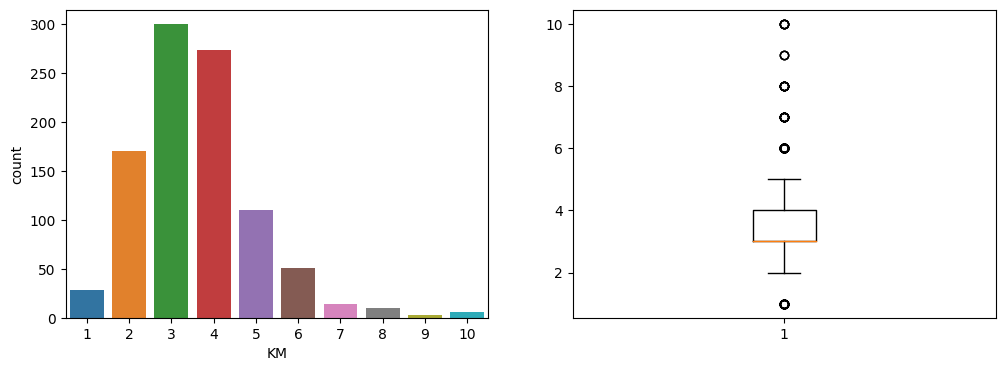

In [ ]:
# Distribusi data
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KM'])

f.add_subplot(1,2,2)
plt.boxplot(df['KM'])

plt.show()

- Atribut GRS

<Axes: xlabel='GRS'>

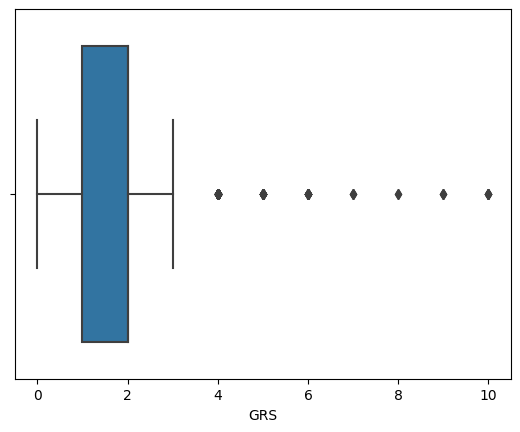

In [ ]:
sns.boxplot(x='GRS', data=df)

In [ ]:
q15,q35=np.percentile(df['GRS'], [25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q15-(1.5*s5)
print("Q1 :",q15)
print("Q3 :",q35)
print("Selisih :",s5)
print("Batas Atas :",ba5)
print("Batas Bawah :",bw5)

Q1 : 1.0
Q3 : 2.0
Selisih : 1.0
Batas Atas : 3.5
Batas Bawah : -0.5


In [ ]:
# shows outlier data on the GRS attribute
dt5 = df[(df['GRS']<bw5) | (df['GRS']>ba5)]
dt5.head()

,HARGA,LB,LT,KT,KM,GRS
2,3000000000,267,250,4,4,4
13,12500000000,200,979,4,2,6
19,9700000000,450,248,5,5,4
27,6500000000,300,200,5,5,4
43,15000000000,339,643,7,5,5


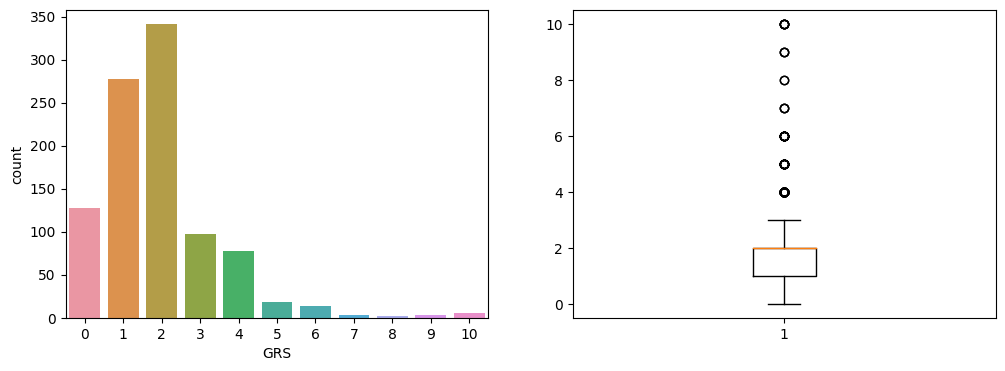

In [ ]:
# Distribusi data
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['GRS'])

f.add_subplot(1,2,2)
plt.boxplot(df['GRS'])

plt.show();

- Atribut Harga

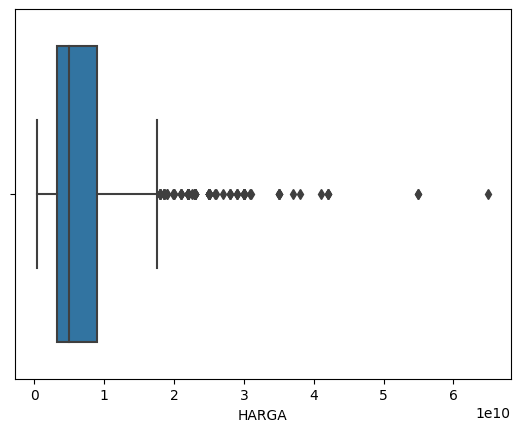

In [ ]:
sns.boxplot(x='HARGA', data=df);

In [ ]:
q16,q36=np.percentile(df['HARGA'], [25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
print("Q1 :",q16)
print("Q3 :",q36)
print("Selisih :",s6)
print("Batas Atas :",ba6)
print("Batas Bawah :",bw6)

Q1 : 3250000000.0
Q3 : 9000000000.0
Selisih : 5750000000.0
Batas Atas : 17625000000.0
Batas Bawah : -5375000000.0


In [ ]:
# shows outlier data on the Harga attribute
dt6 = df[(df['HARGA']<bw6) | (df['HARGA']>ba6)]
dt6.head()

,HARGA,LB,LT,KT,KM,GRS
18,18000000000,200,251,5,3,3
31,42000000000,900,600,7,7,1
50,41000000000,850,600,7,7,0
54,23000000000,750,610,8,6,4
61,18000000000,300,410,5,3,0


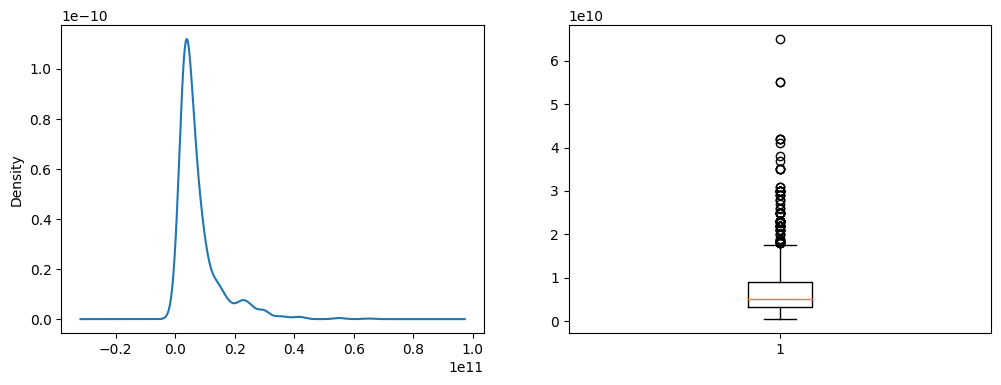

In [ ]:
# Distribusi data
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['HARGA'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['HARGA'])

plt.show()

Analisis Korelasi

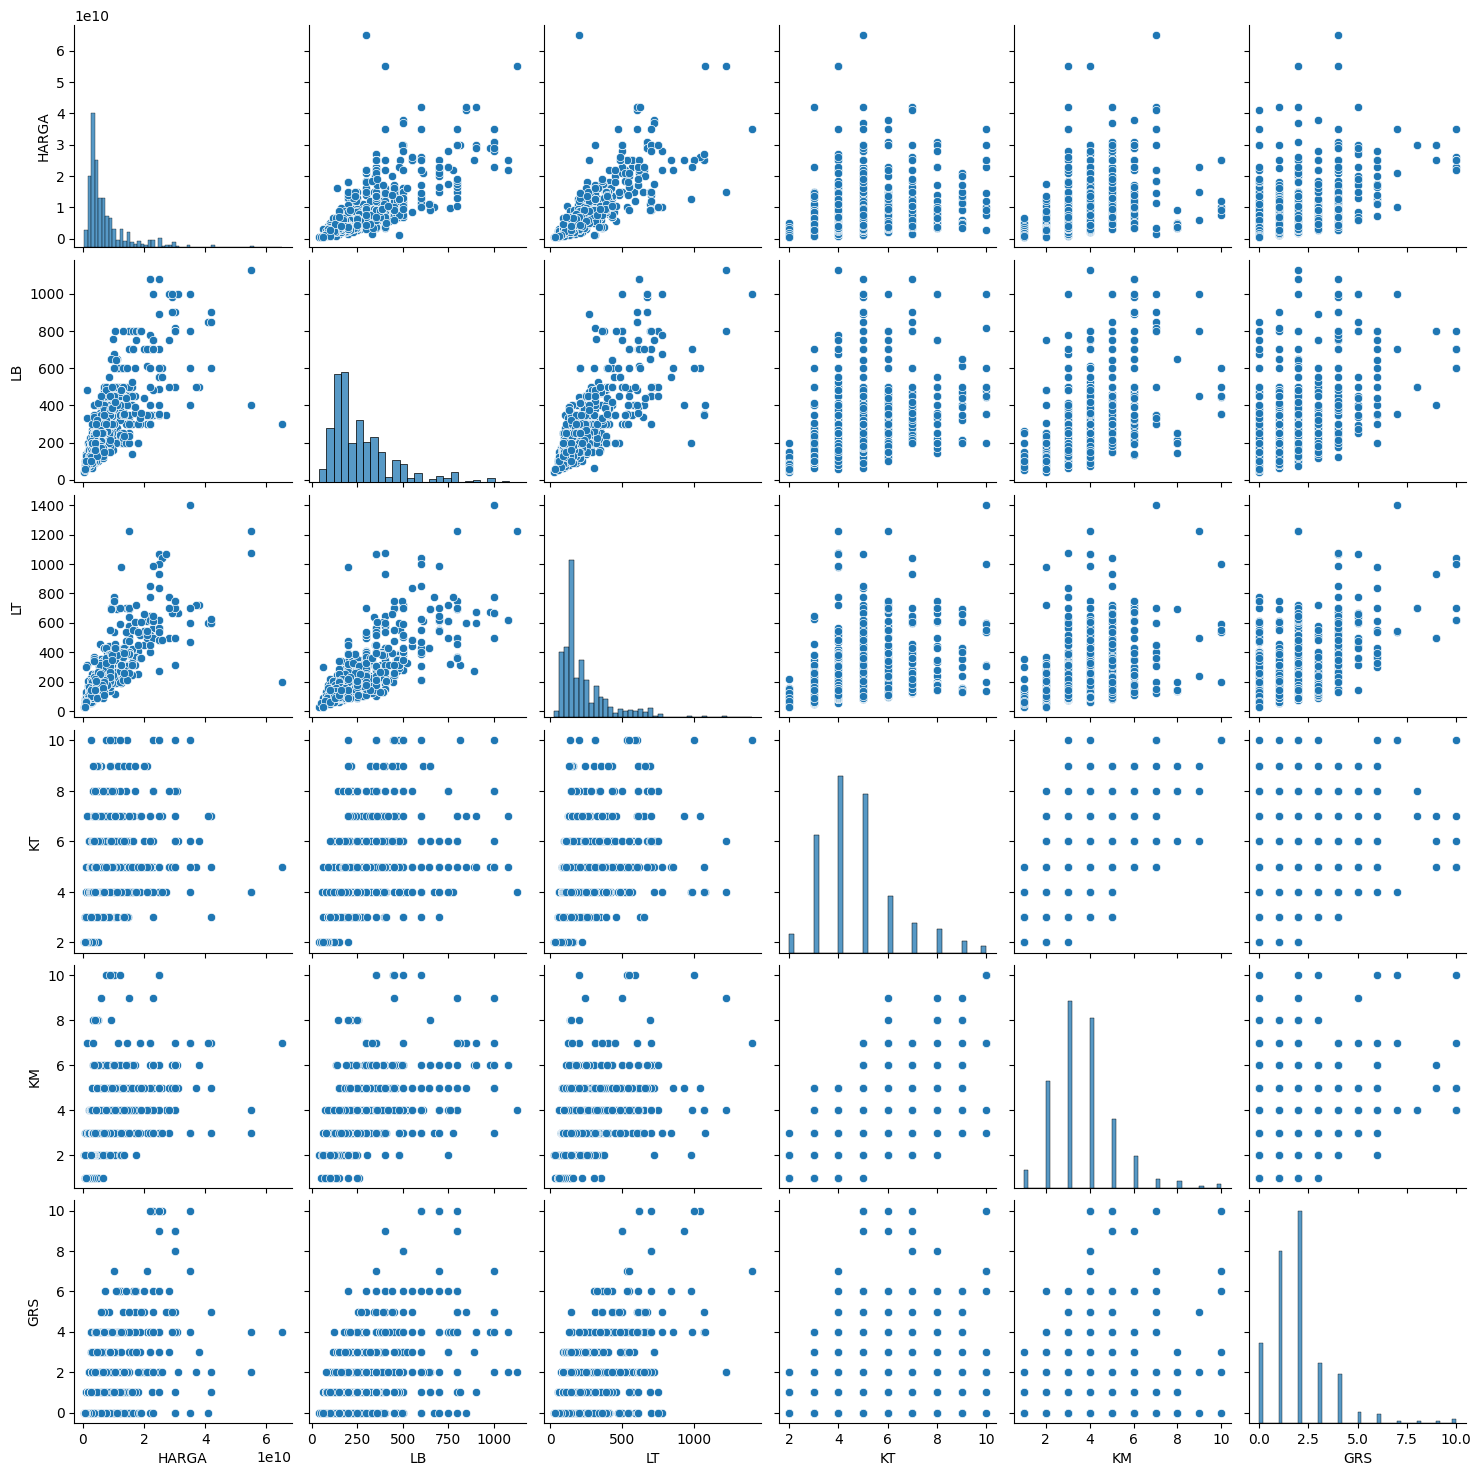

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr().style.background_gradient().set_precision(1)

<ipython-input-39-19005abe7e07>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(1)


,HARGA,LB,LT,KT,KM,GRS
HARGA,1.0,0.7,0.8,0.3,0.4,0.5
LB,0.7,1.0,0.7,0.4,0.5,0.5
LT,0.8,0.7,1.0,0.4,0.4,0.5
KT,0.3,0.4,0.4,1.0,0.7,0.3
KM,0.4,0.5,0.4,0.7,1.0,0.3
GRS,0.5,0.5,0.5,0.3,0.3,1.0
